In [5]:
from astroquery.jplhorizons import Horizons
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functions
import subprocess
import os
import time

Object and observatory details

In [23]:
object = 'Dembowska'
end_date = '2024-03-10'
start_date = '2024-01-10'
step = '3d'
obs_code = 995

Import Horizons data

In [24]:
eph = functions.get_jpl_ephemeris(object, obs_code, start_date, end_date, step)
jpl_peri_arg, jpl_sma, jpl_asc_node, jpl_eccentricity, jpl_inc, jpl_period, jpl_peri_dist, jpl_apogee_dist = functions.get_jpl_elements(object)
jpl_elements = np.array([jpl_peri_arg, jpl_sma, jpl_asc_node, jpl_eccentricity, jpl_inc, jpl_period, jpl_peri_dist, jpl_apogee_dist], dtype=np.float64)

Plot difference between JPL Horizons orbital elements and those returned by find_orb for the JPL Horizons astrometry

2024-Jan-10 00:00
2024-Jan-13 00:00
[ 0.03144837  6.56818777  2.05509135  7.94834232  0.18633234 19.81994868
  0.67789758 11.49384448]
2 0.031448372228147704
2 6.568187772010376
2 2.055091346332883
2 7.948342321787807
2 0.18633233523091036
2 19.819948675746232
2 0.6778975774878946
2 11.493844482036328
2024-Jan-10 00:00
2024-Jan-13 00:00
2024-Jan-16 00:00
[0.00079114 0.00065774 0.00033996 0.00083228 0.00014655 0.00096709
 0.00073927 0.00058957]
3 0.0007911360311390424
3 0.0006577398787491843
3 0.0003399604902365873
3 0.0008322828027065369
3 0.00014654719523675216
3 0.0009670909900779417
3 0.0007392692335117552
3 0.0005895654591858624
2024-Jan-10 00:00
2024-Jan-13 00:00
2024-Jan-16 00:00
2024-Jan-19 00:00
[0.00275197 0.0003015  0.00069968 0.00907683 0.00051378 0.00047105
 0.00058702 0.0010445 ]
4 0.00275197107596929
4 0.0003014964914584288
4 0.0006996782494803073
4 0.00907682924376009
4 0.0005137847180191739
4 0.00047105425298539223
4 0.0005870174378576311
4 0.0010445014086738166
2024-Ja

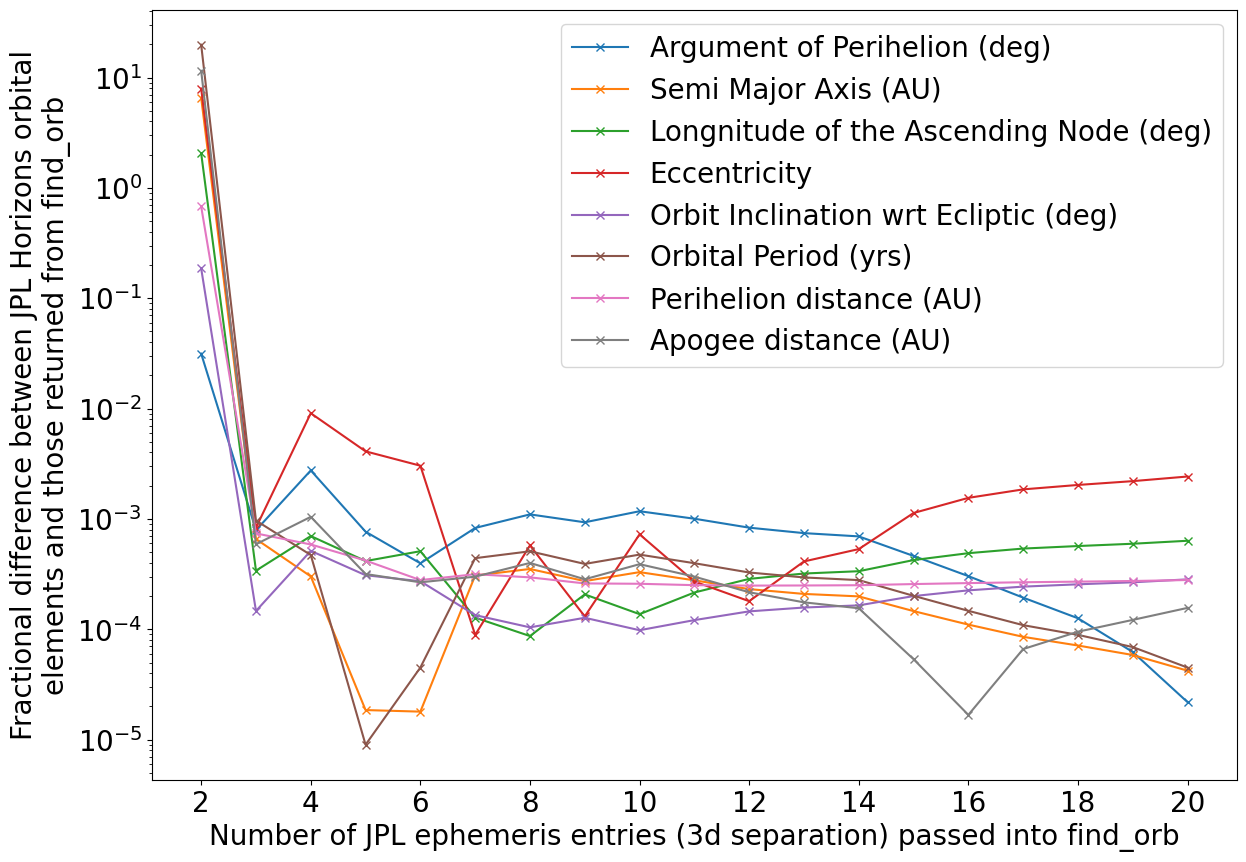

In [25]:
diffs = [[],[],[],[],[],[],[],[]]
no_of_obs = []

for j in range(2, len(eph)):
    #converts object name to the correct format for find_orb.
    object_list = []
    for l in range(0, 12):
        try:
            object_list.append(object[l])
        except:
            object_list.append(' ')
    object_designation = ''.join(map(str, object_list))

    functions.read_jpl_ephemeris(eph, object_designation, obs_code, rows_to_read=j)
    functions.run_find_orb('jpl_eph.txt')

    fo_peri_arg, fo_sma, fo_asc_node, fo_eccentricity, fo_inc, fo_period, fo_peri_dist, fo_apogee_dist, fo_epoch, fo_mean_anomaly = functions.read_fo_elements('elements.txt')
    fo_elements = np.array([fo_peri_arg, fo_sma, fo_asc_node, fo_eccentricity, fo_inc, fo_period, fo_peri_dist, fo_apogee_dist], dtype=np.float64)
    
    diff = abs((np.subtract(jpl_elements,fo_elements)/jpl_elements))
    print(diff)
    for k in range(0, len(diff)):
        print(j, diff[k])
        diffs[k].append(diff[k])
    no_of_obs.append(j)

print(diffs)
print(no_of_obs)
plt.figure(figsize=(14,10))
plt.rcParams.update({'font.size': 20, 'lines.markersize': 6})
elements = ['Argument of Perihelion (deg)', 'Semi Major Axis (AU)', 'Longnitude of the Ascending Node (deg)', 'Eccentricity', 'Orbit Inclination wrt Ecliptic (deg)', 'Orbital Period (yrs)', 'Perihelion distance (AU)', 'Apogee distance (AU)']
for i in range(0, len(diffs)):
    plt.plot(no_of_obs, diffs[i], marker='x', label = f'{elements[i]}')
plt.xlabel(f'Number of JPL ephemeris entries ({step} separation) passed into find_orb')
plt.ylabel('Fractional difference between JPL Horizons orbital\nelements and those returned from find_orb')
#plt.axhline(y=0, color='r', linestyle='--')
plt.yscale('log')
plt.xticks(np.linspace(2, 20, 10))
plt.legend()